In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras as ks

Using TensorFlow backend.


In [2]:
## Read in the entire data set just for eyeballing.
pd_data = pd.read_csv('K_data.csv', header=None)
np_data = np.array(pd_data.values, dtype=np.float32) ## float32 might be better if using a GPU
pd_data

,0,1,2,3,4,5
0,1.729100e-03,1.509,0.52360,3,2,0.0100
1,1.965300e-03,1.558,0.54105,3,2,0.0100
2,2.224300e-03,1.607,0.55851,3,2,0.0100
3,2.507300e-03,1.656,0.57596,3,2,0.0100
4,2.815600e-03,1.705,0.59341,3,2,0.0100
5,3.150700e-03,1.753,0.61087,3,2,0.0100
6,3.513700e-03,1.802,0.62832,3,2,0.0100
7,3.906100e-03,1.850,0.64577,3,2,0.0100
8,4.329200e-03,1.898,0.66323,3,2,0.0100
9,4.784300e-03,1.946,0.68068,3,2,0.0100


In [3]:
## Read in the training data, which includes both the input features and the outputs K.
pd_train = pd.read_csv('K_training_random_stand.csv', header=None)
np_train = np.array(pd_train.values, dtype=np.float32) ## float32 might be better if using a GPU
np_train

array([[2.6582001e-04, 9.4499999e-01, 9.3334609e-01, ..., 1.0000000e+00,
        1.0000000e+00, 2.0000000e-01],
       [6.9525000e-03, 2.1370001e+00, 2.1666348e-01, ..., 0.0000000e+00,
        1.0000000e+00, 5.0000000e-01],
       [5.4947002e-12, 1.1000000e-02, 0.0000000e+00, ..., 1.0000000e+00,
        9.0909094e-02, 6.0000002e-01],
       ...,
       [1.3298000e-10, 2.5000000e-02, 6.6663486e-01, ..., 1.0000000e+00,
        9.0909094e-02, 9.9179999e+02],
       [2.5088999e-16, 1.0000000e-03, 9.1663486e-01, ..., 1.0000000e+00,
        0.0000000e+00, 9.9600000e+02],
       [1.9636000e-06, 2.7700001e-01, 3.6666349e-01, ..., 0.0000000e+00,
        0.0000000e+00, 9.9640002e+02]], dtype=float32)

In [4]:
## Extract the input features: theta, m, n, h_star
features = np_train[:, 2:6]
features

array([[0.9333461 , 1.        , 1.        , 1.        ],
       [0.21666348, 0.        , 0.        , 1.        ],
       [0.        , 1.        , 1.        , 0.09090909],
       ...,
       [0.66663486, 1.        , 1.        , 0.09090909],
       [0.91663486, 1.        , 1.        , 0.        ],
       [0.3666635 , 0.        , 0.        , 0.        ]], dtype=float32)

In [5]:
## Extract the correct outputs K
correct_outputs = np_train[:, 1]
correct_outputs[1:5]

array([2.137, 0.011, 0.03 , 0.022], dtype=float32)

In [6]:
## Read in the test data, which includes both the input features and the output K.
pd_test = pd.read_csv('K_testing_stand.csv', header=None)
np_test = pd_test.values
np_test_features = np_test[:, 2:6]

In [7]:
np_test_outputs = np_test[:, 1]
np_test_outputs

array([1.509e+00, 1.915e+00, 9.540e-01, 5.470e-01, 2.140e-01, 3.100e-02,
       1.790e-01, 2.200e-02, 1.000e-03, 3.864e+00, 3.303e+00])

In [8]:
# Plot the results, but only use Theta for the input since we only want a two-dimensional graph with a 
# single value for input and a single value for output. In actuality, there are four input values.

def plot_predictions(predictions, model_name):
    theta_train = np_train[:, 2]  ## The third column in the data is Theta
    theta_test = np_test[:, 2]
    test_values = np_test[:, 1]

    plt.figure()
    plt.scatter(theta_train, correct_outputs, s=20, edgecolor="black",
                c="lightgreen", label="training data")
    plt.scatter(theta_test, test_values, s=100, color="orange", label="testing data")
    plt.scatter(theta_test, predictions, s=50, color="red", label="predictions")
    plt.xlabel("Theta")
    plt.ylabel("K")
    plt.title(f"Neural Net Regression for {model_name}")
    plt.legend()
    plt.show()

In [9]:
## Run the neural net against the test cases and return the predictions.

def run_neural_net(model, tests):
    predictions = []
    for i in range(len(tests)):
        a_test = tests[i]
        predict = model.predict(np.array([a_test]))
        predictions.append(predict[0][0])
    return predictions

In [10]:
##  Define and compile a neural net model.
layer_0 = ks.layers.Dense(units=50, input_shape=[4])
layer_1 = ks.layers.Dense(units=30)
layer_2 = ks.layers.Dense(units=1)
model_1 = ks.Sequential([layer_0, layer_1, layer_2])

model_1.summary()
model_1.compile(loss='mean_squared_error',
              optimizer=ks.optimizers.Adam(0.1))

W0810 19:15:18.353932 140653316970304 deprecation_wrapper.py:119] From /home/earl/Desktop/jupyenv-py3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0810 19:15:18.376564 140653316970304 deprecation_wrapper.py:119] From /home/earl/Desktop/jupyenv-py3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0810 19:15:18.380405 140653316970304 deprecation_wrapper.py:119] From /home/earl/Desktop/jupyenv-py3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0810 19:15:18.468861 140653316970304 deprecation_wrapper.py:119] From /home/earl/Desktop/jupyenv-py3/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.tr

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                250       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 1,811
Trainable params: 1,811
Non-trainable params: 0
_________________________________________________________________


In [11]:
## Train the neural net against the training data
history_1 = model_1.fit(features, correct_outputs, epochs=250, verbose=True)
print("Finished training the model")

W0810 19:15:18.611404 140653316970304 deprecation_wrapper.py:119] From /home/earl/Desktop/jupyenv-py3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0810 19:15:18.722434 140653316970304 deprecation_wrapper.py:119] From /home/earl/Desktop/jupyenv-py3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/250
538/538 [==============================] - 0s 591us/step - loss: 6.9581
Epoch 2/250
538/538 [==============================] - 0s 42us/step - loss: 1.2814
Epoch 3/250
538/538 [==============================] - 0s 46us/step - loss: 0.3605
Epoch 4/250
538/538 [==============================] - 0s 43us/step - loss: 0.2019
Epoch 5/250
538/538 [==============================] - 0s 40us/step - loss: 0.1970
Epoch 6/250
538/538 [==============================] - 0s 37us/step - loss: 0.1827
Epoch 7/250
538/538 [==============================] - 0s 50us/step - loss: 0.1971
Epoch 8/250
538/538 [==============================] - 0s 41us/step - loss: 0.1944
Epoch 9/250
538/538 [==============================] - 0s 41us/step - loss: 0.1896
Epoch 10/250
538/538 [==============================] - 0s 38us/step - loss: 0.1848
Epoch 11/250
538/538 [==============================] - 0s 39us/step - loss: 0.1983
Epoch 12/250
538/538 [==============================] - 0s 42us/step - loss: 0.2027


538/538 [==============================] - 0s 37us/step - loss: 0.1964
Epoch 99/250
538/538 [==============================] - 0s 38us/step - loss: 0.2050
Epoch 100/250
538/538 [==============================] - 0s 36us/step - loss: 0.2159
Epoch 101/250
538/538 [==============================] - 0s 36us/step - loss: 0.1891
Epoch 102/250
538/538 [==============================] - 0s 33us/step - loss: 0.2029
Epoch 103/250
538/538 [==============================] - 0s 35us/step - loss: 0.1850
Epoch 104/250
538/538 [==============================] - 0s 34us/step - loss: 0.2330
Epoch 105/250
538/538 [==============================] - 0s 35us/step - loss: 0.2089
Epoch 106/250
538/538 [==============================] - 0s 38us/step - loss: 0.2474
Epoch 107/250
538/538 [==============================] - 0s 38us/step - loss: 0.1991
Epoch 108/250
538/538 [==============================] - 0s 37us/step - loss: 0.1918
Epoch 109/250
538/538 [==============================] - 0s 34us/step - loss: 0.

538/538 [==============================] - 0s 39us/step - loss: 0.2134
Epoch 195/250
538/538 [==============================] - 0s 37us/step - loss: 0.1950
Epoch 196/250
538/538 [==============================] - 0s 35us/step - loss: 0.1998
Epoch 197/250
538/538 [==============================] - 0s 39us/step - loss: 0.2111
Epoch 198/250
538/538 [==============================] - 0s 33us/step - loss: 0.2090
Epoch 199/250
538/538 [==============================] - 0s 35us/step - loss: 0.2054
Epoch 200/250
538/538 [==============================] - 0s 41us/step - loss: 0.2069
Epoch 201/250
538/538 [==============================] - 0s 34us/step - loss: 0.1964
Epoch 202/250
538/538 [==============================] - 0s 39us/step - loss: 0.1978
Epoch 203/250
538/538 [==============================] - 0s 36us/step - loss: 0.2082
Epoch 204/250
538/538 [==============================] - 0s 40us/step - loss: 0.2003
Epoch 205/250
538/538 [==============================] - 0s 35us/step - loss: 0

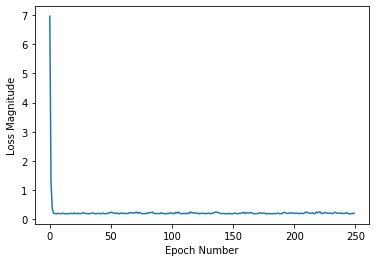

In [12]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history_1.history['loss'])

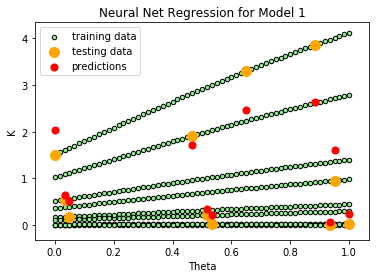

In [13]:
## Run the neural net against the test data to get predictions
## Display a scatter plot of predicted vs. actual

predictions_1 = run_neural_net(model_1, np_test_features)
plot_predictions(predictions_1, 'Model 1')

In [14]:
def calc_mean_error(test_values, predictions):
    """Calculate the mean absolute value error"""
    assert(len(test_values) == len(predictions)), 'Number of test values and predictions not the same'
    
    cum_errors = sum([abs(a-b) for a, b in zip(test_values, predictions)])
    cum_test_values = sum(test_values)
    
    print('Mean absolute error of predictions on test data: {}'.format(cum_errors / len(test_values)))
    print('Mean absolute error % of predictions on test data: {}'.format(cum_errors / cum_test_values * 100), '\n')    

In [15]:
calc_mean_error(np_test_outputs, predictions_1)

Mean absolute error of predictions on test data: 0.4090344960039312
Mean absolute error % of predictions on test data: 35.88308043738132 

